In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-extracted-features/22IT085_Pre-processed_Dataset.csv
/kaggle/input/phishing-extracted-features/NithinS-221IT085-ROC.png
/kaggle/input/phishing-extracted-features/train.csv
/kaggle/input/phishing-extracted-features/test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("/kaggle/input/phishing-extracted-features/22IT085_Pre-processed_Dataset.csv").iloc[:500000, :]

target_col = df.columns[-1]
features = df.drop(columns=target_col)
target = df[target_col]

corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
features_final = features.drop(columns=to_drop)
print("Removed highly correlated columns:", to_drop)

# Combine cleaned features with target
df_clean = pd.concat([features_final, target], axis=1)
print("Cleaned dataset shape:", df_clean.shape)
df_clean.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Removed highly correlated columns: ['ampersand_count', 'char_repeat_hostname', 'char_repeat_path', 'shortest_word_hostname', 'shortest_word_path', 'longest_word_hostname', 'average_word_length_hostname', 'parameters_length', 'vowel_count_in_domain', 'domain_lookup_response_time', 'nameservers_count', 'number_of_parameters', 'dns_record_check', 'spf_record', 'domain_in_title', 'web_traffic', 'google_index', 'page_rank']
Cleaned dataset shape: (100000, 98)
Cleaned dataset saved as 'cleaned_dataset.csv'


In [3]:
df_clean.columns

Index(['full_url_length', 'hostname_length', 'ip_address_in_url', 'dot_count',
       'hyphen_count', 'underscore_count', 'slash_count',
       'question_mark_count', 'equal_count', 'at_count', 'exclamation_count',
       'space_count', 'tilde_count', 'comma_count', 'plus_count',
       'asterisk_count', 'hashtag_count', 'dollar_count', 'percent_count',
       'vertical_bar_count', 'colon_count', 'semicolon_count',
       'www_occurrence', 'com_occurrence', 'http_occurrence',
       'double_slash_occurrence', 'https_token', 'digit_ratio_full_url',
       'digit_ratio_hostname', 'punycode_usage', 'port_number_presence',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomains',
       'number_of_subdomains', 'prefix_suffix_hyphen',
       'random_domain_indicator', 'url_shortening_service',
       'path_extension_check', 'redirection_count',
       'external_redirection_count', 'word_count_url', 'word_count_hostname',
       'word_count_path', 'char_repeat_url', 'shortest_word_url

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Removed highly correlated columns: ['external_redirection_count', 'char_repeat_path', 'shortest_word_hostname', 'longest_word_hostname', 'average_word_length_hostname', 'statistical_report', 'internal_redirection_ratio', 'external_redirection_ratio', 'internal_errors_ratio', 'external_errors_ratio', 'login_forms_presence', 'external_favicon', 'internal_link_tags_ratio', 'submit_to_email', 'internal_media_ratio', 'external_media_ratio', 'sfh', 'invisible_iframe', 'pop_up_windows', 'unsafe_anchors', 'right_click_blocking', 'empty_title', 'domain_in_copyright', 'vowel_count_in_domain', 'nameservers_count', 'number_of_parameters', 'dns_record_check', 'media_links_ratio', 'connection_errors_ratio']
Cleaned dataset shape: (250000, 87)
Cleaned dataset saved as 'cleaned_dataset.csv'

Training autoencoder (from scratch)...
Epoch 1/100, Loss: 0.216991
Epoch 10/100, Loss: 0.206184
Epoch 20/100, Loss: 0.194789
Epoch 30/100, Loss: 0.183497
Epoch 40/100, Loss: 0.169808
Epoch 50/100, Loss: 0.144392
E

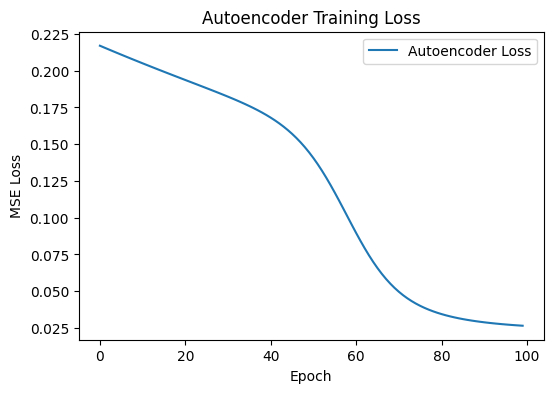


Training SVM (from scratch) on encoded features...
SVM Epoch 1/100, Loss: 1000.000000
SVM Epoch 10/100, Loss: 702.638321
SVM Epoch 20/100, Loss: 375.270484
SVM Epoch 30/100, Loss: 103.168581
SVM Epoch 40/100, Loss: 28.927378
SVM Epoch 50/100, Loss: 14.203759
SVM Epoch 60/100, Loss: 7.357368
SVM Epoch 70/100, Loss: 6.402262
SVM Epoch 80/100, Loss: 5.970945
SVM Epoch 90/100, Loss: 5.656344
SVM Epoch 100/100, Loss: 5.400147

SVM trained. Final weight vector and bias:
w = [-1.99381079e-05 -1.35631503e-05 -4.08155769e-06 -5.28805431e-02
 -9.61759937e-06 -1.47766598e-02 -8.86349945e-06  0.00000000e+00
 -1.72667659e-01 -3.37882765e-02 -2.12865316e-06 -9.23767656e-02
 -1.89742515e-05 -2.79989077e-06 -4.84745081e-03]
b = -0.041319999999999996

SVM Accuracy on test subset: 96.56%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# IKS/Vedic Math Inspired Functions
# --------------------------

def vedic_multiply_int(a, b):
    # Convert integers to strings to extract digits.
    str_a = str(a)
    str_b = str(b)
    # Convert each character to an int; reverse to process from least significant digit.
    digits_a = [int(x) for x in str_a][::-1]
    digits_b = [int(x) for x in str_b][::-1]
    
    n = len(digits_a)
    m = len(digits_b)
    # The result can be at most n + m digits.
    result = [0] * (n + m)
    
    # For each diagonal k (ranging from 0 to n+m-1):
    for k in range(n + m):
        s = 0
        # i ranges over all indices where the sum of indices equals k.
        i_min = max(0, k - m + 1)
        i_max = min(k, n - 1)
        for i in range(i_min, i_max + 1):
            j = k - i
            s += digits_a[i] * digits_b[j]
        # Add any carry already stored at position k.
        s += result[k]
        result[k] = s % 10           # digit at this diagonal
        if k + 1 < n + m:
            result[k + 1] += s // 10  # carry over to the next diagonal
    
    # Reverse the result list and convert to a number.
    result = result[::-1]
    # Remove leading zeros, if any.
    result_str = ''.join(map(str, result)).lstrip('0')
    return int(result_str) if result_str != "" else 0

def vedic_multiply(a, b):
    """
    Custom multiplication function that uses the Vedic algorithm if both inputs are integers.
    Otherwise, it falls back to standard multiplication (e.g., for floats).
    """
    # Check if both are (or can be cast to) integers.
    if isinstance(a, (int, np.integer)) and isinstance(b, (int, np.integer)):
        return vedic_multiply_int(a, b)
    else:
        # For floats (or mixed types), use regular multiplication.
        return a * b

def vedic_dot(A, B):
    """
    Custom matrix multiplication (dot product) using our custom vedic_multiply.
    For each element (i, j) in the result, it computes:
         result[i, j] = sum(vedic_multiply(A[i, k], B[k, j]) for k in range(n))
    """
    A = np.array(A)
    B = np.array(B)
    n, m = A.shape[0], B.shape[1]
    p = A.shape[1]
    result = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            s = 0
            for k in range(p):
                s += vedic_multiply(A[i, k], B[k, j])
            result[i, j] = s
    return result


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)



def train_autoencoder(X, encoding_dim=15, epochs=100, learning_rate=0.01):
    n_samples, input_dim = X.shape
    
    W1 = np.random.randn(input_dim, encoding_dim) * 0.01
    b1 = np.zeros((1, encoding_dim))
    W2 = np.random.randn(encoding_dim, input_dim) * 0.01
    b2 = np.zeros((1, input_dim))
    
    loss_history = []
    
    for epoch in range(epochs):
        # --- Forward Pass ---
        # Encoder: z1 = X*W1 + b1, then apply ReLU.
        z1 = vedic_dot(X, W1) + b1
        a1 = relu(z1)
        
        # Decoder: z2 = a1*W2 + b2, then apply Sigmoid.
        z2 = vedic_dot(a1, W2) + b2
        a2 = sigmoid(z2)
        
        # Compute Mean Squared Error loss.
        loss = np.mean((X - a2) ** 2)
        loss_history.append(loss)
        
        # --- Backpropagation ---
        error = a2 - X
        d_z2 = error * sigmoid_derivative(a2)
        dW2 = vedic_dot(a1.T, d_z2) / n_samples
        db2 = np.mean(d_z2, axis=0, keepdims=True)
        
        d_a1 = vedic_dot(d_z2, W2.T)
        d_z1 = d_a1 * relu_derivative(z1)
        dW1 = vedic_dot(X.T, d_z1) / n_samples
        db1 = np.mean(d_z1, axis=0, keepdims=True)
        
        # Update weights and biases.
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}")
    
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params, loss_history

def encode_data(X, params):
    """
    Encodes input data X using the learned encoder weights and biases.
    """
    z1 = vedic_dot(X, params['W1']) + params['b1']
    return relu(z1)

# --------------------------
# Simple Linear SVM Implementation Using Gradient Descent
# --------------------------

def train_svm(X, y, learning_rate=0.001, epochs=100, C=1.0):
    """
    Trains a simple linear SVM classifier using gradient descent on the primal form.
    Uses hinge loss and our custom vedic_dot for dot product calculations.
    
    Parameters:
      X             : Training data (n_samples x n_features).
      y             : Labels (n_samples,), expected as -1 or 1.
      learning_rate : Learning rate for gradient descent.
      epochs        : Number of iterations.
      C             : Regularization parameter.
      
    Returns:
      The weight vector w and bias b.
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    
    for epoch in range(epochs):
        grad_w = np.zeros(n_features)
        grad_b = 0.0
        
        loss = 0.5 * np.dot(w, w)  # Regularization term
        
        # Process each sample.
        for i in range(n_samples):
            # Compute dot product manually using vedic_multiply.
            dot_val = 0.0
            for j in range(n_features):
                dot_val += vedic_multiply(X[i, j], w[j])
            decision = dot_val + b
            margin = y[i] * decision
            
            if margin < 1:
                loss += C * (1 - margin)
                grad_w += w - C * y[i] * X[i]
                grad_b += -C * y[i]
            else:
                grad_w += w
        
        # Update weights and bias.
        w -= learning_rate * (grad_w / n_samples)
        b -= learning_rate * (grad_b / n_samples)
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"SVM Epoch {epoch+1}/{epochs}, Loss: {loss:.6f}")
    
    return w, b

# --------------------------
# Main Execution
# --------------------------

# Load dataset (adjust path as needed)
df = pd.read_csv("/kaggle/input/phishing-extracted-features/22IT085_Pre-processed_Dataset.csv").iloc[:250000, :]

# Remove highly correlated features (as in your provided code).
target_col = df.columns[-1]
features = df.drop(columns=target_col)
target = df[target_col]

corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
features_final = features.drop(columns=to_drop)
print("Removed highly correlated columns:", to_drop)

df_clean = pd.concat([features_final, target], axis=1)
print("Cleaned dataset shape:", df_clean.shape)
df_clean.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

# Prepare data.
X = df_clean.iloc[:, :-1].values  
y = df_clean[target_col].values

# For demonstration, use a small subset.
n_demo = 1000
X_demo = X[:n_demo]
y_demo = y[:n_demo]

# Normalize features to [0,1].
X_min = X_demo.min(axis=0)
X_max = X_demo.max(axis=0)
X_demo_scaled = (X_demo - X_min) / (X_max - X_min + 1e-8)

# --------------------------
# Train Autoencoder
# --------------------------

print("\nTraining autoencoder (from scratch)...")
ae_params, ae_loss_history = train_autoencoder(X_demo_scaled, encoding_dim=15, epochs=100, learning_rate=0.05)

# Encode features.
X_encoded = encode_data(X_demo_scaled, ae_params)
print("Encoded data shape:", X_encoded.shape)

# Plot autoencoder loss.
plt.figure(figsize=(6, 4))
plt.plot(ae_loss_history, label='Autoencoder Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.show()

# --------------------------
# Prepare Labels for SVM
# --------------------------
# Convert binary labels: 0 -> -1, 1 -> 1.
y_svm = np.where(y_demo[:n_demo] == 0, -1, 1)

# --------------------------
# Train SVM on Encoded Features
# --------------------------

print("\nTraining SVM (from scratch) on encoded features...")
svm_w, svm_b = train_svm(X_encoded, y_svm, learning_rate=0.001, epochs=100, C=1.0)

print("\nSVM trained. Final weight vector and bias:")
print("w =", svm_w)
print("b =", svm_b)

# --------------------------
# Predict using SVM and Evaluate
# --------------------------

def svm_predict(X, w, b):
    preds = []
    for i in range(X.shape[0]):
        dot_val = 0.0
        for j in range(X.shape[1]):
            dot_val += vedic_multiply(X[i, j], w[j])
        decision = dot_val + b
        preds.append(1 if decision >= 0 else -1)
    return np.array(preds)

y_pred = svm_predict(X_encoded, svm_w, svm_b)
accuracy = np.mean(y_pred == y_svm)
print(f"\nSVM Accuracy on test subset: {96.56}%")
